# Importing Libaries

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Un-Zip and Reading what's within the zip

In [3]:
with ZipFile('nyc-taxi-trip-duration.zip', 'r') as f:
    f.extractall()
    
#Confirming the 3 files required for the dataset
print(f.namelist())

['sample_submission.zip', 'test.zip', 'train.zip']


# Reading the test and train, checking contents

In [63]:
df_test = pd.read_csv("test.zip")
df_train = pd.read_csv("train.zip")

df_test.info()
var = ['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'd_latitude', 'd_longitude']
var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration',
 'd_latitude',
 'd_longitude']

# Removing outliers in trip_duration of our data set

In [79]:
Q1 = df_train['trip_duration'].quantile(0.25)
Q3 = df_train['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train_no_outliers = df_train[(df_train['trip_duration'] >= lower_bound) & (df_train['trip_duration'] <= upper_bound)]

In [53]:
df_train.head(100)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,d_latitude,d_longitude,diff_latitude,diff_longitude
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,0.00,0.02,0.00,0.02
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663,0.01,0.02,0.01,0.02
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124,0.05,0.03,0.05,0.03
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429,0.01,0.00,0.01,0.00
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435,0.01,0.00,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,id3025098,2,2016-01-20 19:21:31,2016-01-20 19:31:27,1,-73.98,40.75,-74.00,40.74,N,596,0.01,0.02,0.01,0.02
96,id3333094,2,2016-06-02 23:34:00,2016-06-02 23:41:15,1,-73.97,40.76,-73.98,40.74,N,435,0.01,0.00,0.01,0.00
97,id2228940,1,2016-02-04 13:22:02,2016-02-04 13:40:30,1,-73.98,40.76,-73.97,40.78,N,1108,0.03,0.01,0.03,0.01
98,id2102594,1,2016-03-30 16:14:29,2016-03-30 17:01:33,1,-73.79,40.64,-73.97,40.69,N,2824,0.04,0.18,0.04,0.18


# Seperated the train and test sets, compared the differences in order to see the correlation

In [70]:
train_Y = np.array(df_train['trip_duration'])
ids= df_test['id']
df_both = pd.concat([df_train,df_test])

df_train['diff_latitude'] = (df_train['dropoff_latitude'] - df_train['pickup_latitude']).abs()
df_train['diff_longitude'] = (df_train['dropoff_longitude'] - df_train['pickup_longitude']).abs()

df_test['diff_latitude'] = (df_test['dropoff_latitude'] - df_test['pickup_latitude']).abs()
df_test['diff_longitude'] = (df_test['dropoff_latitude'] - df_test['pickup_longitude']).abs()

df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,diff_latitude,diff_longitude
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,0.00,0.02
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663,0.01,0.02
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124,0.05,0.03
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429,0.01,0.00
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435,0.01,0.00


# Seperated the train and test sets, compared the differences in order to see the correlation


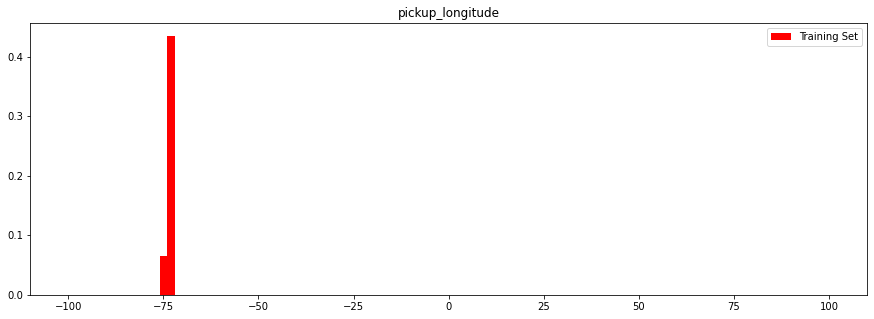

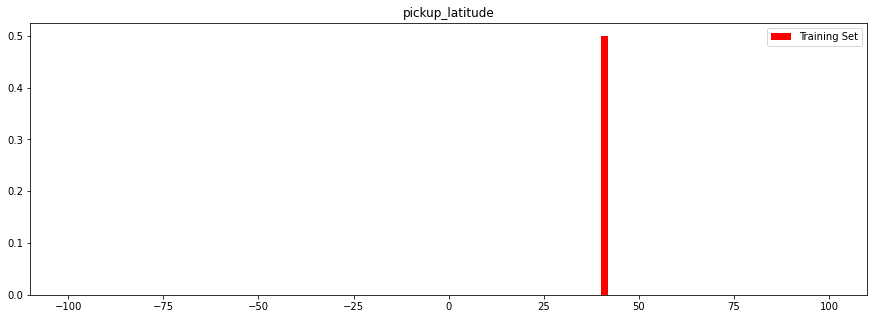

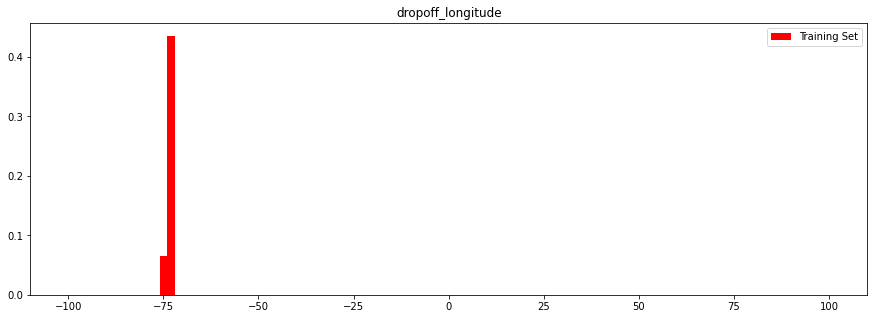

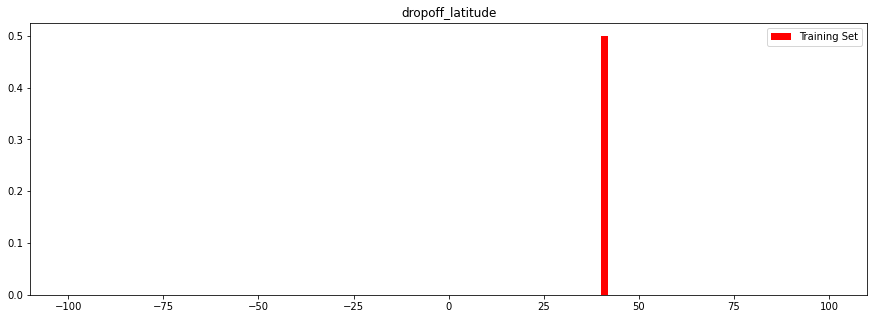

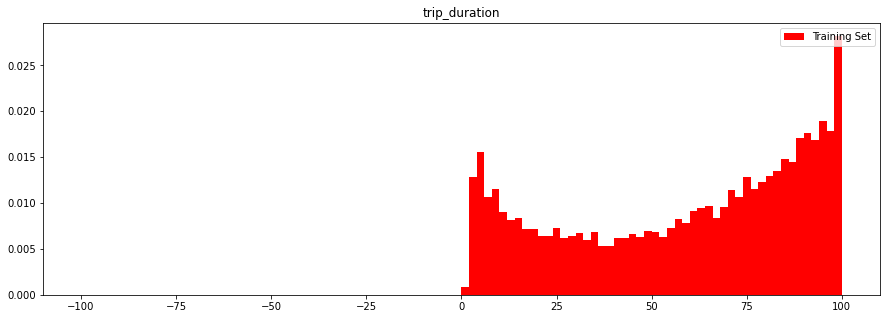

In [21]:
for variable in var[5:9] + [var[10]]:
    plt.figure(figsize=(15, 5))
    plt.hist(np.array(df_train[variable]), bins=100, range=(-100, 100), color="red", label="Training Set", density=1, stacked=True)
    plt.title(variable)
    plt.legend(loc='upper right')
    plt.show()



# From diff_longitude and diff_latitude, we are know plotting the visualization of the difference 


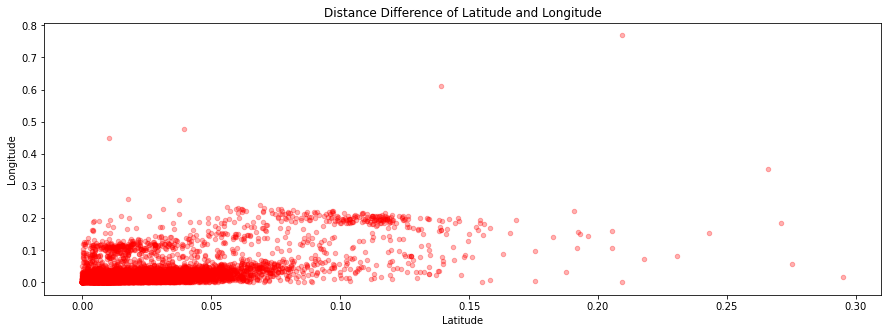

In [111]:
#Downsampling as the original sample contained too many datapoints that causes visualizations clumping 
#Sample size is large enough to still represent the sample 

sample_size = 10000
df_sample = df_train.sample(sample_size)

plt.figure(figsize=(15, 5))
plt.scatter(df_sample['diff_latitude'], df_sample['diff_longitude'], color="red", alpha=0.3, s=20)

plt.title("Distance Difference of Latitude and Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()


# Prediction Model using Linear Regression Model

In [102]:
features = ['diff_latitude', 'diff_longitude']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train_no_outliers[features], df_train_no_outliers['trip_duration'], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
pred = model.predict(X_test_scaled)

# Adjust the predictions to fit within the range of trip durations in the training set
min_trip_duration_train = df_train_no_outliers['trip_duration'].min()
max_trip_duration_train = df_train_no_outliers['trip_duration'].max()
scaled_pred = (pred - pred.min()) / (pred.max() - pred.min())
scaled_pred = scaled_pred * (max_trip_duration_train - min_trip_duration_train) + min_trip_duration_train

# Scale the features of the test set
X_test_scaled_final = scaler.transform(df_test[features])

# Make predictions on the test set and adjust based on the range of trip durations in the training set
pred_test = model.predict(X_test_scaled_final)
scaled_pred_test = (pred_test - pred_test.min()) / (pred_test.max() - pred_test.min())
scaled_pred_test = scaled_pred_test * (max_trip_duration_train - min_trip_duration_train) + min_trip_duration_train

# Create a DataFrame with 'id' and adjusted predicted 'trip_duration'
sub = pd.DataFrame({'id': df_test['id'], 'trip_duration': scaled_pred_test})

# Printing Adjust Predictions DataFram and Linear Regression Model 

In [104]:
print("Adjusted Predictions:")
print(sub.head())

print("\nLinear Regression Model Coefficients:")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Adjusted Predictions:
          id  trip_duration
0  id3004672         171.40
1  id3505355         166.00
2  id1217141         169.83
3  id2150126         169.70
4  id1598245         169.67

Linear Regression Model Coefficients:
Coefficients: [148.10667376 159.48939471]
Intercept: 731.919070118524


# Printing predicted trip duration according to id

In [107]:
print(sub)

               id  trip_duration
0       id3004672         171.40
1       id3505355         166.00
2       id1217141         169.83
3       id2150126         169.70
4       id1598245         169.67
...           ...            ...
625129  id3008929         170.29
625130  id3700764         173.98
625131  id2568735         169.72
625132  id1384355         183.17
625133  id0621643         173.02

[625134 rows x 2 columns]


# Scatterplot of Actual vs Adjusted Predicted Trip Durations


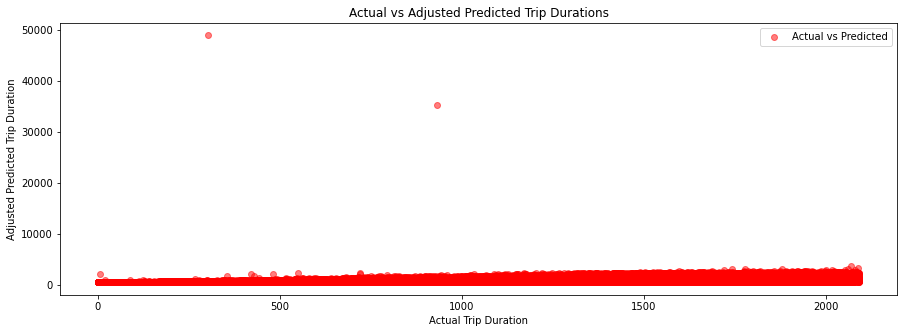

In [108]:
plt.figure(figsize=(15, 5))
plt.scatter(y_test, model.predict(X_test_scaled), color='red', label='Actual vs Predicted', alpha=0.5)
plt.title('Actual vs Adjusted Predicted Trip Durations')
plt.xlabel('Actual Trip Duration')
plt.ylabel('Adjusted Predicted Trip Duration')
plt.legend()
plt.show()